In [1]:
#!pip3 install dtaidistance

    100% |████████████████████████████████| 327kB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 17.3MB 102kB/s ta 0:00:01
    100% |████████████████████████████████| 2.1MB 565kB/s ta 0:00:01
  Running setup.py bdist_wheel for dtaidistance ... done
  Stored in directory: /home/marina/.cache/pip/wheels/82/ef/68/c75da7d222ade8053a165c5eb62ff6b7e6150768b13cafb42e
Successfully built dtaidistance


# Some insights before we begin:

- ## Highest frequency years are more interesting that lowest
#

# Loading unigrams that I processed in the previous notebook. Apart from unigrams and their annual frequencies, I also added 4 numbers:
- summa	(just ABSOLUTE sums of frequencies for all years)
- max_diff (maximum ABSOLUTE difference between the highest and the lowest frequencies)


- rel_summa	(sum of all RELATIVE frequencies)
- rel_max_diff (maximum RELATIVE difference between the highest and the lowest frequencies)

In [1]:
import dtaidistance #library for dynamic time warping
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [2]:
# load our file
df = pd.read_csv('deviations_from_mean.csv')

In [5]:
df.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2004,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.694196,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.621972,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.218698,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,18.616064,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.625414,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267


In [354]:
len(df)

410241

In [305]:
def get_array(word):
    return np.array(df[df.unigram == word].iloc[0, 1:93])

In [315]:
# dynamic time warping similarity lookup
def get_similar_word(df, word, window=None):
    vector1 = get_array(word)
    dictionary = {}
    for unigram in df.unigram[:50000]:
        vector2 = get_array(unigram)
        dictionary[unigram] = dtw.distance(vector1, vector2, window)
    return dictionary.items() #sorted(dictionary.items(), key=lambda x:x[1], reverse=False)

In [17]:
%time d = get_similar_word('атом')

CPU times: user 44.8 s, sys: 217 ms, total: 45 s
Wall time: 45.3 s


In [308]:
d = sorted(d, key=lambda x:x[1], reverse=False)

NameError: name 'd' is not defined

In [ ]:
ax = plt.gca()

for word in d[5:10]:
    plt.plot(range(1918, 2010), get_array(word[0]))
plt.show()

In [ ]:
d[5:10]

In [21]:
d = get_similar_word('яйцо')
d = sorted(d, key=lambda x:x[1], reverse=False)
d[:10]

[('а/см', 214800.31296997683),
 ('а1а', 218553.3189613006),
 ('а12о', 219305.65018713038),
 ('а120з', 219307.34739401686),
 ('а1г', 219656.85164592523),
 ('а1в', 220301.25123339632),
 ('а/дм', 220573.0271542738),
 ('а/м', 220574.4445238387),
 ('а1и', 220974.39797406396),
 ('i5вn', 221103.10421158723)]

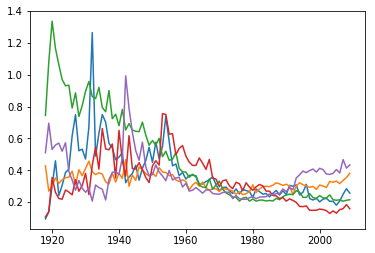

In [426]:
ax = plt.gca()

for word in d[:5]:
    plt.plot(range(1918, 2010), get_array(word[0]))
plt.show()

In [427]:
d = get_similar_word('коммунистический')
d = sorted(d, key=lambda x:x[1], reverse=False)
d[:10]

[('коммунистический', 0.0),
 ('коэффициент', 2.214283182031106),
 ('концентрация', 2.25785854087336),
 ('англия', 2.3126807641697535),
 ('кпсс', 2.3488192888762),
 ('измерение', 2.38887861205744),
 ('давление', 2.702131399720811),
 ('газ', 2.998465047131702),
 ('кислота', 3.067353969843391),
 ('классовый', 3.0903507506853027)]

In [432]:
d[:30]

[('коммунистический', 0.0),
 ('коэффициент', 2.214283182031106),
 ('концентрация', 2.25785854087336),
 ('англия', 2.3126807641697535),
 ('кпсс', 2.3488192888762),
 ('измерение', 2.38887861205744),
 ('давление', 2.702131399720811),
 ('газ', 2.998465047131702),
 ('кислота', 3.067353969843391),
 ('классовый', 3.0903507506853027),
 ('губа', 3.1138360962536984),
 ('коллектив', 3.120034538833972),
 ('германский', 3.14488774325016),
 ('горький', 3.203040567290858),
 ('глубина', 3.236180211379461),
 ('дивизия', 3.4328281331000685),
 ('активность', 3.440506237232851),
 ('конь', 3.441876484083534),
 ('капиталистический', 3.444366140613961),
 ('короткий', 3.474473057032057),
 ('изда', 3.495288320115133),
 ('английский', 3.5479829264927107),
 ('демократический', 3.5573527376719114),
 ('корабль', 3.6003059226239214),
 ('длинный', 3.616682295850047),
 ('комиссар', 3.6741279214692955),
 ('компонент', 3.746597814352627),
 ('иванович', 3.781860709633286),
 ('длина', 3.7915116072130464),
 ('красноармеец

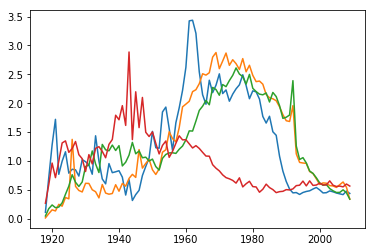

In [434]:
ax = plt.gca()

for word in d[:4]:
    plt.plot(range(1918, 2010), get_array(word[0]))
plt.show()

In [438]:
d = get_similar_word('иванович')
d = sorted(d, key=lambda x:x[1], reverse=False)
d[:10]

[('иванович', 0.0),
 ('директор', 1.5753829590774833),
 ('достижение', 1.6347424713037768),
 ('конкретный', 1.6879332046983833),
 ('девушка', 1.69943943478289),
 ('короткий', 1.733452626549653),
 ('изображение', 1.7372231746034275),
 ('дополнительный', 1.7495385673972137),
 ('адрес', 1.8091618127777482),
 ('карта', 1.8203081207636211)]

In [454]:
d[:30]

[('иванович', 0.0),
 ('директор', 1.5753829590774833),
 ('достижение', 1.6347424713037768),
 ('конкретный', 1.6879332046983833),
 ('девушка', 1.69943943478289),
 ('короткий', 1.733452626549653),
 ('изображение', 1.7372231746034275),
 ('дополнительный', 1.7495385673972137),
 ('адрес', 1.8091618127777482),
 ('карта', 1.8203081207636211),
 ('депутат', 1.8275123468054768),
 ('александр', 1.8292828179639773),
 ('активный', 1.8384196799059958),
 ('игра', 1.8508334311974688),
 ('демократический', 1.8636063461099908),
 ('аппарат', 1.8743407280705089),
 ('конечный', 1.8765200289773944),
 ('алексей', 1.9082832410839679),
 ('исполнение', 1.932298428897589),
 ('категория', 1.949019711747741),
 ('английский', 1.9592300041887427),
 ('корпус', 1.962078867135064),
 ('конституция', 1.986452892220134),
 ('андрей', 2.0027437911180797),
 ('кто-то', 2.009359251596932),
 ('дочь', 2.018333009195676),
 ('доля', 2.0185276428340844),
 ('квартира', 2.022743275941055),
 ('исследователь', 2.023153257913064),
 ('ис

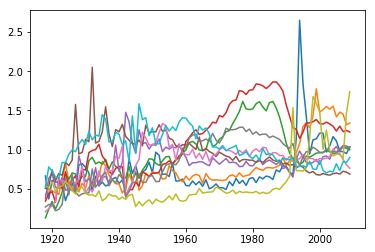

In [446]:
ax = plt.gca()

for word in d[:10]:
    plt.plot(range(1918, 2010), get_array(word[0]))
plt.show()

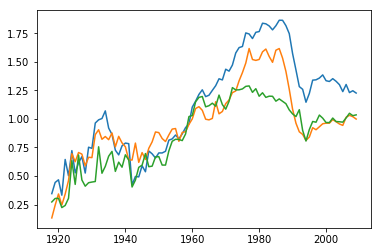

In [453]:
n = 0
phrase = 'конкретный достижение дополнительный'
for i in phrase.split():
    vals = df[df.unigram == i].iloc[n, 1:-5]
    plt.plot(years, vals)

In [8]:
columns = ['unigram'] + [i for i in df.unigram]
words = pd.DataFrame(columns=columns)

In [108]:
for word in df.unigram[:2]:
    words.append([word + [sim[1] for sim in get_similar_word(words)]], columns=columns)

MemoryError: 

# Sort by difference from mean

In [3]:
df_diff = df.copy()

In [4]:
df_diff.iloc[:, 1:-4 ] = df.iloc[:, 1:-4].diff()

In [7]:
idx = 0
print (df.unigram.iloc[idx])
arr = df.iloc[idx, 1:-4]
round(max(max(arr) - np.mean(arr), np.mean(arr) - max(arr)) * 100 / np.mean(arr), 2)

как


9199.86

In [26]:
def get_deviation(arr):
    arr = list(arr)
    dev = round(max(max(arr) - np.mean(arr), np.mean(arr) - max(arr)) * 100 / np.mean(arr), 2)
    return dev


In [27]:
dev = [get_deviation(df.iloc[i, 1:-5]) for i in range(len(df))]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df['deviation_from_mean'] = dev

In [5]:
df.head()

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,deviation_from_mean
0,как,47.047624,50.485318,51.249606,51.324196,51.174535,50.690452,43.827938,46.661967,43.969615,...,42.500982,43.109769,42.680030,43.139763,42.728090,247411509.0,1358855.0,3818.433795,6.862513,23.66
1,для,39.036406,39.355981,36.372634,35.476594,34.023851,33.740838,37.896171,34.679782,37.146528,...,30.345128,30.883207,30.777979,29.839784,29.342707,224808916.0,949912.0,3299.256128,4.312338,11.44
2,который,57.506854,58.760933,48.914409,49.913671,45.856711,43.924041,41.801180,40.520746,37.656026,...,35.102393,35.800814,35.790432,35.352373,35.406858,205673046.0,1095121.0,3207.133563,9.846525,68.56
3,или,24.556165,25.115971,23.030987,20.249053,19.808623,20.124200,23.478078,20.004466,20.104439,...,17.760823,19.057366,18.700423,19.169327,20.437974,105426662.0,535503.0,1631.491025,5.029258,41.63
4,год,18.330851,15.306693,15.909211,14.357555,14.889439,15.255392,17.956783,17.783390,16.347415,...,20.784922,21.194543,21.730999,21.910810,21.658590,100948572.0,692196.0,1454.257712,3.444267,38.61


In [8]:
big_diff = df[(df.rel_summa > 10) & (df.deviation_from_mean > 30)].sort_values('deviation_from_mean', ascending=False).reset_index(drop=True)

In [9]:
print (len(big_diff))
big_diff.head(30)

1249


,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,deviation_from_mean
0,договариваться,0.240200,0.121996,0.204809,0.083221,0.139407,0.137436,4.055679,0.134427,0.101372,...,0.299723,0.307066,0.335576,0.380187,0.419176,1409860.0,34175.0,21.870845,3.921252,1606.03
1,исторша,2.418378,2.177605,1.005800,1.292695,0.772898,0.443123,0.476248,0.316510,0.239036,...,0.005523,0.002379,0.010011,0.001395,0.001402,201557.0,12636.0,13.221169,1.171806,1582.84
2,из,20.052024,13.834251,8.469421,14.006178,10.456039,4.983705,4.001511,3.207609,1.906268,...,0.074730,0.046599,0.030381,0.016490,0.015236,1696015.0,80324.0,111.835022,6.217774,1549.56
3,он,3.013419,2.276811,1.327909,2.235599,1.611155,0.843897,0.682338,0.474718,0.308899,...,0.012162,0.012014,0.006945,0.004007,0.005546,271297.0,13252.0,17.447684,0.948902,1488.95
4,армша,0.716311,0.501390,0.839718,1.488990,1.809048,0.679608,0.944872,0.364991,0.674959,...,0.000805,0.001123,0.000267,0.000269,0.000319,114744.0,8314.0,10.691479,1.129440,1456.68
5,гитлеровский,0.000000,0.000447,0.021970,0.000000,0.000130,0.000176,0.011152,0.000643,0.007671,...,0.119163,0.081175,0.073270,0.090259,0.085786,1043950.0,23836.0,20.766892,3.040439,1407.80
6,гитлер,0.000000,0.000000,0.015268,0.000000,0.000000,0.004050,0.006828,0.004224,0.007671,...,0.361129,0.269850,0.280144,0.380047,0.324592,1300481.0,14410.0,22.320785,2.683326,1258.48
7,дер,0.111132,0.148808,0.168316,0.110168,0.153542,0.111023,0.133486,0.284280,0.192763,...,0.140872,0.108796,0.134033,0.135298,0.126076,1165042.0,192172.0,17.455047,2.059415,1256.02
8,государев,1.610822,0.322641,0.230131,0.085863,0.174810,0.109878,0.115961,0.104034,0.172555,...,0.130996,0.126347,0.128702,0.084062,0.088123,562109.0,11307.0,11.542286,1.288181,1183.94
9,красноармеец,0.043283,0.164449,0.245399,0.314918,0.218642,0.199683,0.264013,0.253336,0.184185,...,0.136245,0.117480,0.121804,0.117925,0.099450,1178404.0,128103.0,19.275428,1.334748,958.54


In [10]:
years = range(1918, 2010)

In [11]:
iterator = iter(range(len(big_diff)))

In [12]:
big_diff[big_diff.unigram == 'голод']

,unigram,1918,1919,1920,1921,1922,1923,1924,1925,1926,...,2005,2006,2007,2008,2009,summa,max_diff,rel_summa,rel_max_diff,deviation_from_mean
196,голод,0.458564,0.607745,0.652783,1.048053,0.757466,0.553618,0.457016,0.51411,0.4398,...,0.344157,0.326874,0.323021,0.358026,0.341614,1847174.0,11889.0,32.170432,0.39527,199.72


In [179]:
def plot_n(n):
    vals = big_diff.iloc[n, 1:93]
    m = plt.plot(years, vals)
    print (big_diff.iloc[n,0])
    big_diff.iloc[n, 1:93].apply(abs).sort_values(ascending=False)[:10]

In [177]:
def plot_phrase(phrase, leg=True):
    n = 0
    legnd = []
    for i in phrase.split():
        vals = df[df.unigram == i].iloc[n, 1:93]
        plt.plot(years, vals)
        legnd.append('{}: {}'.format(i, max(vals.sort_values(ascending=False)[:1].index)))
    if leg:
        l = plt.legend(legnd)

исторша


1918    2.418378
1919    2.177605
1921    1.292695
1920    1.005800
1922    0.772898
1924    0.476248
1923    0.443123
1925    0.316510
1928    0.279590
1930    0.275015
Name: 1, dtype: float64

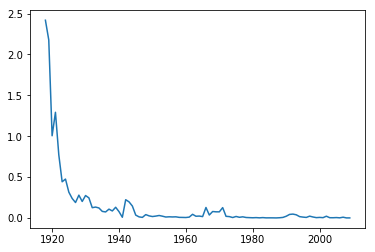

In [15]:
# Old typing (pre-revolutionary)
n = next(iterator)
plot_n(n)

из


1918    20.052024
1921    14.006178
1919    13.834251
1922    10.456039
1920     8.469421
1923     4.983705
1924     4.001511
1930     3.808837
1925     3.207609
1928     2.346739
Name: 2, dtype: float64

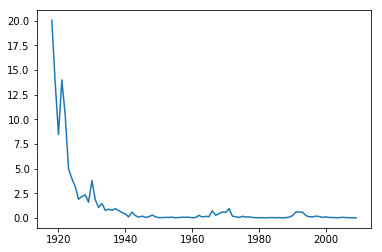

In [16]:
# Some things are hard to examplain, like this one:
n = next(iterator)
plot_n(n)

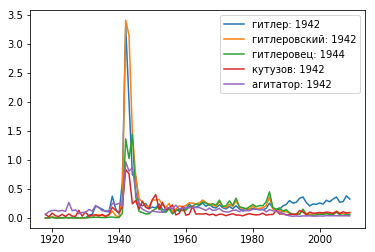

In [185]:
# Some things need no explaination
phrase = 'гитлер гитлеровский гитлеровец кутузов агитатор'
plot_phrase(phrase)

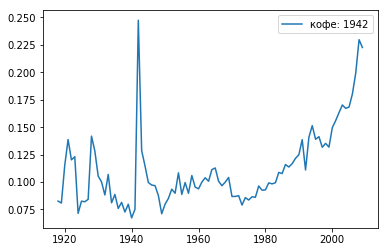

In [187]:
# Coffee mystery
phrase = 'кофе'
plot_phrase(phrase)

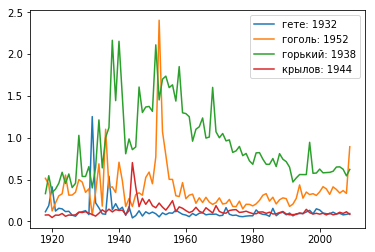

In [344]:
# Anniversaries of famous people's deaths
phrase = 'гете гоголь горький крылов' # правда, горький умер в 1936, но почему-то бОльший пик пришелся на 1938
plot_phrase(phrase)

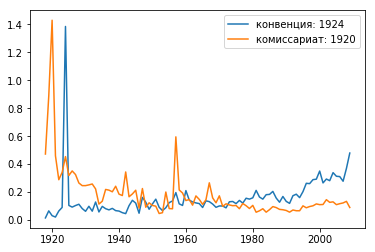

In [183]:
# USSR establishment
phrase = 'конвенция комиссариат'
plot_phrase(phrase)

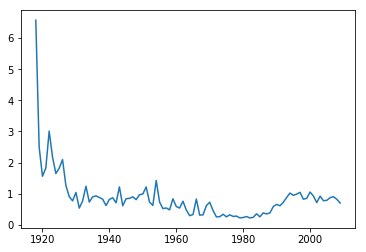

In [36]:
# tsar heritage
phrase = 'государь'
plot_phrase(phrase)

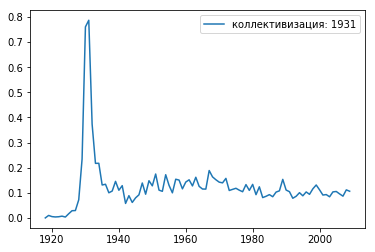

In [173]:
# 
#n = next(iterator)
phrase = 'коллективизация'
plot_phrase(phrase)

# But we let's try to find the higherst / lowest point for each ngram and visualize those having the same year

In [214]:
# for each unigram I find the highest frequency year (I skip the lowest)
max_year = [big_diff.iloc[i, 1:93].sort_values(ascending=False)[:1].index[0] for i in range(len(big_diff))]
big_diff['max_year'] = max_year

In [311]:
# War words
war = [str(y) for y in (range(1939,1946))]
for year in war:
    print (year)
    print(sorted(list(big_diff[big_diff.max_year == year].unigram)), '\n')

1939
['актер', 'грань', 'давид', 'драма', 'драматург', 'интеллигенция', 'кисть', 'кривая'] 

1940
['изгиб', 'изложение', 'испытание', 'корень', 'корневой', 'корней', 'краткий', 'кролик'] 

1941
['али', 'герцен', 'глагол', 'гласный', 'говор', 'драматический', 'дуга', 'измена', 'изоляция', 'код', 'колокол'] 

1942
['автомат', 'агитатор', 'агитация', 'александров', 'америка', 'ата', 'атака', 'аэродром', 'гарнизон', 'где-то', 'германский', 'героический', 'гибель', 'гибнуть', 'гитлер', 'гитлеровский', 'глаз', 'глухой', 'гнать', 'гнев', 'голос', 'гордиться', 'гордость', 'гореть', 'город', 'госпиталь', 'готовить', 'готовиться', 'грабеж', 'грозный', 'громкий', 'грудь', 'далекий', 'двадцать', 'двенадцать', 'двигаться', 'двинуться', 'двое', 'девушка', 'девять', 'дед', 'дежурный', 'день', 'держать', 'десяток', 'десять', 'детский', 'дикий', 'добираться', 'дождаться', 'домик', 'донесение', 'доноситься', 'дорога', 'дорожка', 'доска', 'доставать', 'драться', 'дрова', 'дрожать', 'дым', 'дышать', 'идти

In [218]:
# USSR beginning
war = [str(y) for y in (range(1921,1926))]
for year in war:
    print (year)
    print(sorted(list(big_diff[big_diff.max_year == year].unigram)), '\n')

1921
['анна', 'глупость', 'глупый', 'говорить', 'голова', 'голод', 'голодный', 'горячо', 'господи', 'гость', 'готовый', 'град', 'гроб', 'гроза', 'грозить', 'громко', 'грубо', 'грустный', 'давно', 'дама', 'даром', 'дверь', 'диван', 'диктатура', 'добро', 'довольный', 'доктор', 'долго', 'домой', 'думать', 'дурной', 'извинять', 'изволить', 'интеллигент', 'испугаться', 'испытывать', 'исход', 'кажется', 'казаться', 'катастрофа', 'когда', 'когда-нибудь', 'кой', 'коли', 'комната', 'кончать', 'кончаться', 'кормить', 'красавица', 'красивый', 'крест', 'кровать', 'кто', 'кто-нибудь', 'куда', 'ясно', 'ясность'] 

1922
['алексеев', 'армша', 'атаман', 'генерал', 'греция', 'дабы', 'далеко', 'девица', 'действительно', 'денежный', 'дон', 'донской', 'ибо', 'кабинет', 'казак', 'кант', 'комендант', 'конечно', 'крайне', 'кредитный', 'круг'] 

1923
['англичанин', 'дело', 'интересоваться', 'иск', 'искренний', 'исчерпывать', 'купец'] 

1924
['апрель', 'генеральный', 'государство', 'действующий', 'дипломатическ

In [253]:
# War words
war = [str(y) for y in (range(1930, 1939))]
for year in war:
    print (year)
    print(sorted(list(big_diff[big_diff.max_year == year].unigram)), '\n')

1930
['аграрный', 'глина', 'гос', 'избыток', 'известь', 'изредка', 'кислота', 'кислый', 'ягода'] 

1931
['артель', 'диалектика', 'диалектический', 'директива', 'инвентарь', 'индустриализация', 'индустрия', 'кадр', 'кампания', 'классовый', 'книжка', 'коллективизация', 'колоссальный', 'колхозный', 'комбинат', 'кулак', 'куча'] 

1932
['аммиак', 'аппарат', 'ареал', 'гете', 'госплан', 'гребень', 'грубый', 'группа', 'густой', 'дальневосточный', 'деление', 'детальный', 'дешевый', 'длина', 'длинный', 'дневной', 'дно', 'достаточный', 'достигать', 'известняк', 'изменчивость', 'иметься', 'индивидуальный', 'иркутск', 'искусственный', 'исследовательский', 'кавказ', 'кальций', 'квалифицированный', 'кишка', 'климатический', 'количественный', 'количество', 'коллекция', 'колония', 'комбинация', 'конечность', 'коренной', 'коричневый', 'корм', 'корма', 'кормление', 'кормовой', 'короткий', 'короче', 'кость', 'край', 'кризис', 'кроме', 'крупный', 'крыло', 'крыть', 'яйцо', 'якутский', 'ячейка'] 

1933
['изы

In [275]:
# 1990s
war = [str(y) for y in (range(1988, 2000))]
for year in war:
    print (year)
    print(sorted(list(big_diff[big_diff.max_year == year].unigram)), '\n')

1988
['абстрактный', 'аспект'] 

1989
['дискуссия', 'думаться', 'кооператив'] 

1990
['дефицит', 'из-за', 'консервативный'] 

1991
['англ', 'диагностика', 'идеальный'] 

1992
['активация', 'алгебра', 'аналог', 'аналогичный', 'аналогия', 'аномалия', 'аргумент', 'ассоциация', 'атом', 'генезис', 'генетический', 'геология', 'гипотеза', 'глубинный', 'граница', 'граничный', 'днк', 'доказательство', 'докл', 'достаточно', 'индекс', 'интегральный', 'ион', 'ионный', 'исчезновение', 'карбонатный', 'катион', 'кинетический', 'кислород', 'клетка', 'клеточный', 'контакт', 'континентальный', 'кора', 'космический', 'краевой', 'кристалл', 'кристаллизация', 'кристаллический', 'крыса', 'купол'] 

1993
['культ'] 

1994
['август', 'александр', 'александрович', 'алексеевич', 'алексей', 'анатолий', 'андреевич', 'андрей', 'грех', 'григорий', 'григорьевич', 'декабрь', 'дер', 'дмитрий', 'дурак', 'иван', 'иванович', 'июль', 'кладбище', 'козлов', 'константин', 'красноармеец', 'кузнецов'] 

1995
['явный'] 

1996
[]

In [285]:
# War words
war = [str(y) for y in (range(2000, 2010))]
for year in war:
    print (year)
    print(sorted(list(big_diff[big_diff.max_year == year].unigram)), '\n')

2000
['апостол', 'дар', 'иисус', 'коми'] 

2001
['архангельский', 'археология', 'иванов', 'игорь', 'казахстан', 'концепция'] 

2002
['автореф', 'афганистан', 'десятилетие', 'деяние', 'деятельность', 'диалог', 'дис', 'иванова', 'инвестиция', 'интеграция', 'информационный', 'канд', 'кодекс', 'конфликт', 'концерт', 'культура', 'культурный'] 

2003
['американец', 'армения', 'деятель', 'дипломат', 'доллар', 'израиль', 'истый', 'казачий', 'календарь', 'канцелярия', 'коллега', 'языковой'] 

2004
['идеология', 'изобразительный', 'кафедра', 'кино', 'копия'] 

2005
['авторский', 'академический', 'армейский', 'героиня', 'герой', 'дагестан', 'дальний', 'дважды', 'документальный', 'икона', 'историк', 'историко', 'история', 'категория', 'командующий'] 

2006
['алтай', 'георгий', 'дата', 'должность', 'доступ', 'издательский', 'империя', 'иосиф', 'иран', 'исследователь', 'комментарий', 'контекст'] 

2007
['абсолютно', 'автономный', 'агентство', 'адвокат', 'альбом', 'далее', 'демонстрировать', 'имя', '

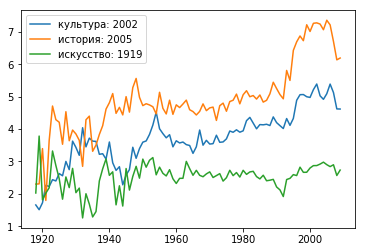

In [304]:
phrase = ' '.join(['культура', 'история', 'искусство'])
plot_phrase(phrase)

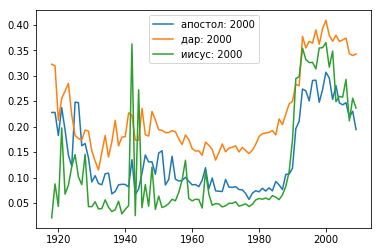

In [286]:
phrase = ' '.join(['апостол', 'дар', 'иисус'])
plot_phrase(phrase)

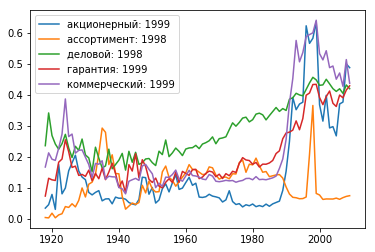

In [284]:
phrase = 'акционерный ассортимент деловой гарантия коммерческий'
plot_phrase(phrase)

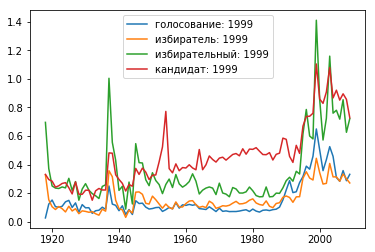

In [281]:
phrase = 'голосование избиратель избирательный кандидат'
plot_phrase(phrase)

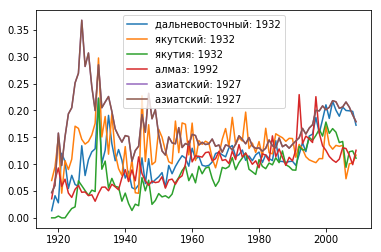

In [338]:
phrase = 'дальневосточный якутский якутия алмаз азиатский азиатский'
plot_phrase(phrase)

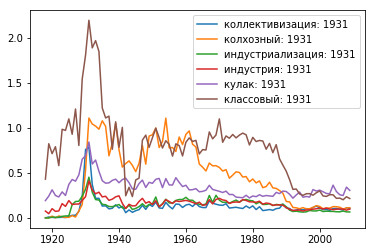

In [266]:
phrase = 'коллективизация колхозный индустриализация индустрия кулак классовый'
plot_phrase(phrase)

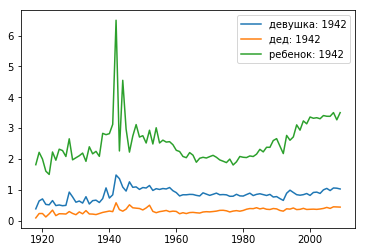

In [329]:
phrase = 'девушка дед ребенок' # девочка детство'
plot_phrase(phrase)

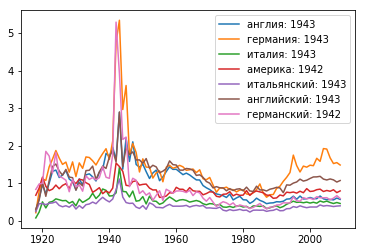

In [252]:
phrase = 'англия германия италия америка итальянский английский германский'
plot_phrase(phrase)

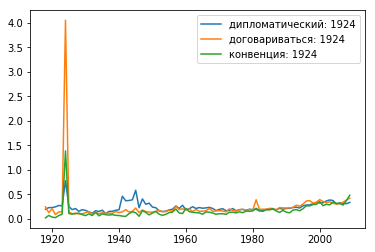

In [246]:
phrase = 'дипломатический договариваться конвенция'
plot_phrase(phrase)

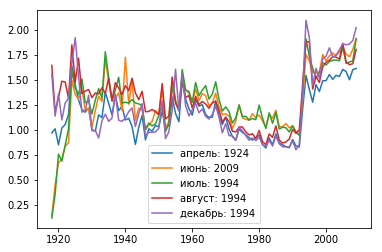

In [239]:
phrase = 'апрель июнь июль август декабрь'
plot_phrase(phrase)

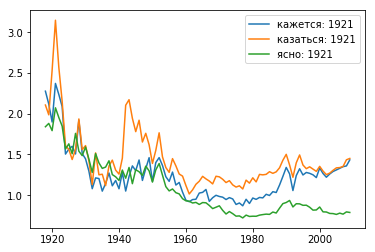

In [232]:
phrase = 'кажется казаться ясно'
plot_phrase(phrase)

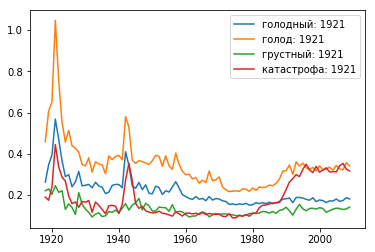

In [227]:
phrase = 'голодный голод грустный катастрофа'
plot_phrase(phrase)

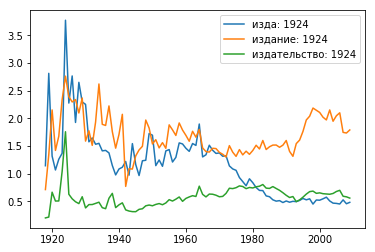

In [224]:
phrase = ' '.join(['изда', 'издание', 'издательство'])
plot_phrase(phrase)

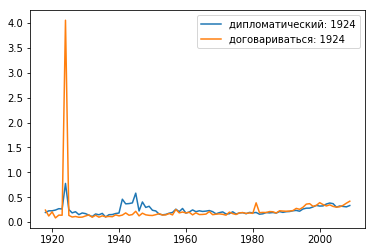

In [223]:
phrase = 'дипломатический договариваться'
plot_phrase(phrase)

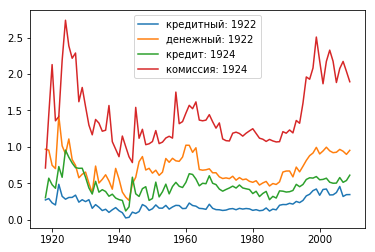

In [222]:
phrase = 'кредитный денежный кредит комиссия'
plot_phrase(phrase)

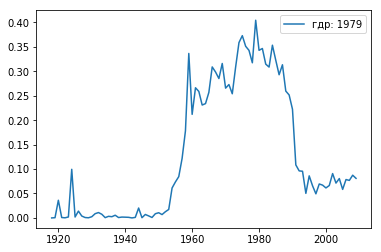

In [210]:
phrase = 'гдр'
plot_phrase(phrase)

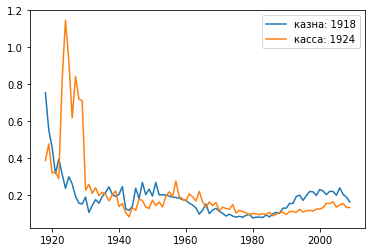

In [163]:
phrase = 'казна касса'
plot_phrase(phrase)

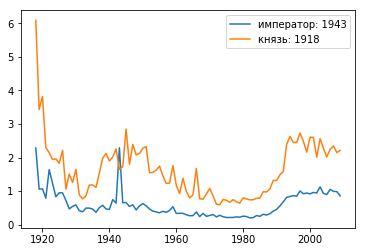

In [175]:
phrase = 'император князь'
plot_phrase(phrase)

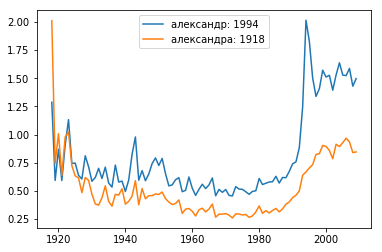

In [161]:
phrase = 'александр александра'
plot_phrase(phrase)

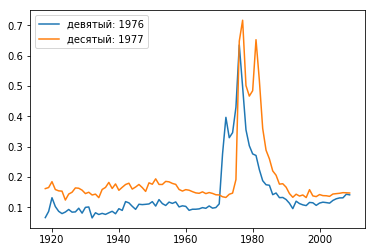

In [164]:
phrase = 'девятый десятый'
plot_phrase(phrase)

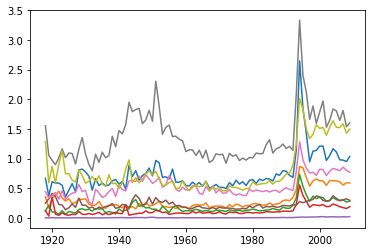

In [355]:
phrase = 'иванович александрович алексеевич григорьевич игоревич ивановна алексей иван александр'
plot_phrase(phrase, leg=False)

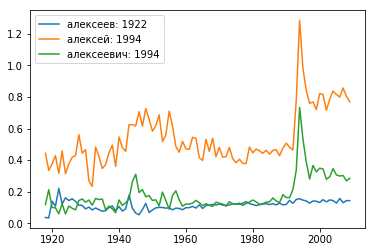

In [360]:
phrase = 'алексеев алексей алексеевич'
plot_phrase(phrase)

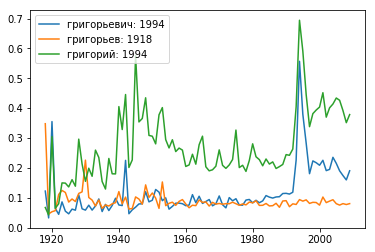

In [361]:
phrase = 'григорьевич григорьев григорий'
plot_phrase(phrase)

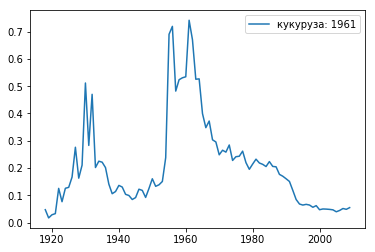

In [168]:
phrase = 'кукуруза'
plot_phrase(phrase)

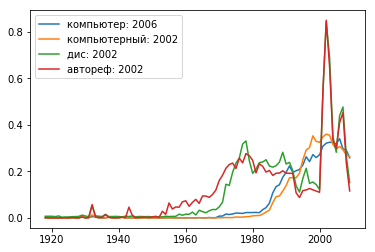

In [170]:
phrase = 'компьютер компьютерный дис автореф'
plot_phrase(phrase)

# DTW

In [316]:
#with window it's faster
%time d = get_similar_word(big_diff, 'атом', window=5)

CPU times: user 1min 6s, sys: 476 ms, total: 1min 6s
Wall time: 1min 7s


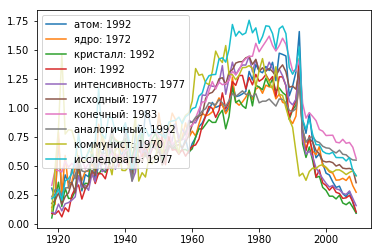

In [323]:
plot_phrase(' '.join([i[0] for i in d[:10]]))

In [317]:
d = sorted(d, key=lambda x:x[1])

In [321]:
d[:20]

[('атом', 0.0),
 ('ядро', 1.057677017909254),
 ('кристалл', 1.0773483732857163),
 ('ион', 1.1423031776641779),
 ('интенсивность', 1.2018226047073781),
 ('исходный', 1.2218799484542002),
 ('конечный', 1.5327442380010288),
 ('аналогичный', 1.6333263754973284),
 ('коммунист', 1.8881735891300988),
 ('исследовать', 1.909515927315503),
 ('канал', 1.9971070241943876),
 ('конструкция', 2.0491476644709303),
 ('изделие', 2.0849612011577268),
 ('комплексный', 2.161943389913681),
 ('доказательство', 2.1699051935585225),
 ('колебание', 2.187911328824364),
 ('киев', 2.227882526823168),
 ('кадр', 2.242771002223307),
 ('атмосфера', 2.2448636819252967),
 ('интервал', 2.2797360761476346)]

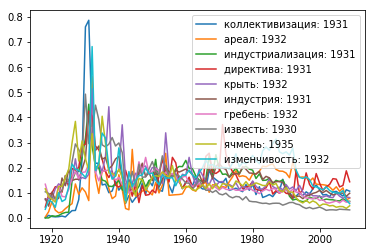

In [325]:
%time d = get_similar_word(big_diff, 'коллективизация', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))

In [327]:
d[:30]

[('коллективизация', 0.0),
 ('ареал', 0.5802303342851548),
 ('индустриализация', 0.5882879007567026),
 ('директива', 0.6583621072245219),
 ('крыть', 0.6600134250767773),
 ('индустрия', 0.6816097939672822),
 ('гребень', 0.7003663949728931),
 ('известь', 0.705516378860297),
 ('ячмень', 0.7306990699969613),
 ('изменчивость', 0.7432422777537071),
 ('колос', 0.7472397027686636),
 ('гусеница', 0.7533301094075435),
 ('грудной', 0.7543391386394387),
 ('гибрид', 0.7589458549748264),
 ('янва', 0.7664084122323188),
 ('апр', 0.7689541270945478),
 ('довоенный', 0.77238610612255),
 ('якутский', 0.7767280570700515),
 ('инж', 0.7770766115394704),
 ('конечность', 0.7782302641894918),
 ('авг', 0.7782697583533509),
 ('кормление', 0.7826438854654789),
 ('девка', 0.7835313982798137),
 ('дека', 0.7911818703489574),
 ('коричневый', 0.7918516770952785),
 ('кишка', 0.7931823092623039),
 ('ягода', 0.7980325244797855),
 ('азиатский', 0.8024305567477148),
 ('диалектика', 0.8073583272090786),
 ('колодец', 0.813235

CPU times: user 1min 8s, sys: 478 ms, total: 1min 9s
Wall time: 1min 10s


[('конфликт', 0.0),
 ('администрация', 0.6852837842912518),
 ('кандидат', 0.828128895083767),
 ('административный', 0.9741408226427436),
 ('автономный', 1.1355718845667575),
 ('дата', 1.1463675755471807),
 ('империя', 1.2383557923899295),
 ('кто-то', 1.2740236580429938),
 ('исполнительный', 1.2792160151693843),
 ('генеральный', 1.3306451449282986),
 ('кстати', 1.4480267904942994),
 ('явно', 1.4690547179036724),
 ('детство', 1.486408322326273),
 ('андрей', 1.5194450797589174),
 ('девочка', 1.5617739927320364)]

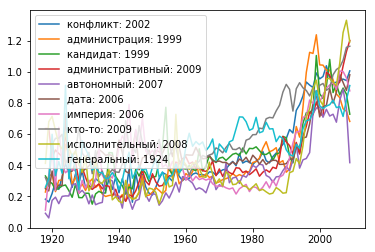

In [341]:
%time d = get_similar_word(big_diff, 'конфликт', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:15]

CPU times: user 1min 5s, sys: 291 ms, total: 1min 5s
Wall time: 1min 5s


[('гитлер', 0.0),
 ('гитлеровский', 1.1624590339582361),
 ('атака', 2.317760700641384),
 ('гитлеровец', 2.4507692248290645),
 ('героический', 2.661356658519368),
 ('командование', 2.7741295146464484),
 ('артиллерия', 2.7993481156018944),
 ('авиация', 2.8038326045967685),
 ('артиллерийский', 2.857937061141908),
 ('агитатор', 2.8874292773303254)]

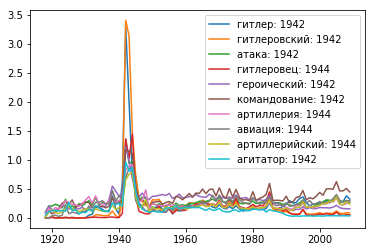

In [345]:
%time d = get_similar_word(big_diff, 'гитлер', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:10]

In [348]:
d[:30]

[('гитлер', 0.0),
 ('гитлеровский', 1.1624590339582361),
 ('атака', 2.317760700641384),
 ('гитлеровец', 2.4507692248290645),
 ('героический', 2.661356658519368),
 ('командование', 2.7741295146464484),
 ('артиллерия', 2.7993481156018944),
 ('авиация', 2.8038326045967685),
 ('артиллерийский', 2.857937061141908),
 ('агитатор', 2.8874292773303254),
 ('автомат', 2.924974170148401),
 ('англо', 2.9460334865150855),
 ('кутузов', 2.9502742644253694),
 ('иоанн', 2.9734390541002287),
 ('кровавый', 2.980946807115928),
 ('дым', 3.034554429858261),
 ('казахский', 3.043075435250238),
 ('гвардейский', 3.053695610846088),
 ('комсомолец', 3.0587965769309657),
 ('крылов', 3.0626242445681067),
 ('госпиталь', 3.0698703322382763),
 ('академик', 3.0777990373521362),
 ('итальянский', 3.10518846343041),
 ('испания', 3.108813624148958),
 ('главнокомандующий', 3.116190194462373),
 ('архитектура', 3.1398528146672695),
 ('катя', 3.16686023516961),
 ('костер', 3.169876616539661),
 ('крикнуть', 3.1946107642495645),


CPU times: user 1min 9s, sys: 535 ms, total: 1min 9s
Wall time: 1min 10s


[('инженер', 0.0),
 ('длительный', 0.5570683375353651),
 ('инструмент', 0.756414011612122),
 ('кольцо', 0.7772656585604063),
 ('географический', 0.7972185253607107),
 ('камера', 0.8085702188474966),
 ('критический', 0.8525655730101894),
 ('дно', 0.8821192313150187),
 ('добыча', 0.9569596500207044),
 ('исследовательский', 1.0377396890206214)]

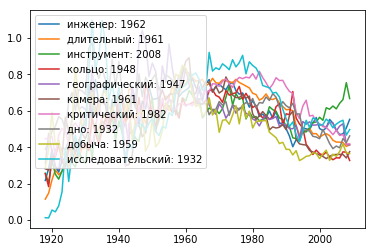

In [349]:
%time d = get_similar_word(big_diff, 'инженер', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:10]

CPU times: user 1min 5s, sys: 303 ms, total: 1min 6s
Wall time: 1min 6s


[('демократический', 0.0),
 ('горный', 1.7440365710735228),
 ('карта', 1.8229890929633528),
 ('действительность', 1.9668482931674387),
 ('критика', 2.059769978223576),
 ('изображение', 2.2183191964034172),
 ('доказывать', 2.2927156640950113),
 ('добиваться', 2.326462796974244),
 ('конференция', 2.343431621475299),
 ('горький', 2.384309085720147)]

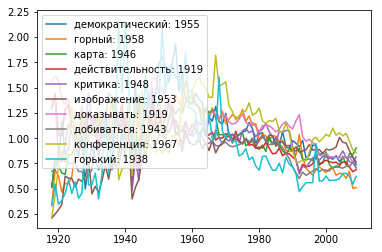

In [350]:
%time d = get_similar_word(big_diff, 'демократический', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:10]

CPU times: user 1min 7s, sys: 356 ms, total: 1min 7s
Wall time: 1min 8s


[('ислам', 0.5138739658732417),
 ('ключевой', 0.5428425018790007),
 ('демонстрировать', 0.5886950591868358),
 ('компетенция', 0.5900022147916342),
 ('корпорация', 0.6424122336948476),
 ('коммуникация', 0.6802409434380837),
 ('ирина', 0.6977441708311792),
 ('деяние', 0.7050054138960585),
 ('агентство', 0.7062574042555033),
 ('иисус', 0.7244124985286269)]

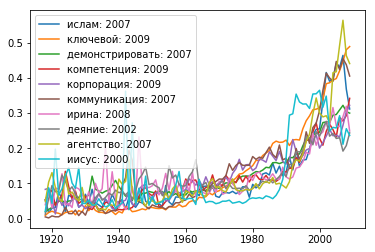

In [351]:
%time d = get_similar_word(big_diff, 'компьютер', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:10]

CPU times: user 1min 7s, sys: 474 ms, total: 1min 8s
Wall time: 1min 8s


[('доставка', 0.0),
 ('арена', 0.19017879517426525),
 ('исчерпывать', 0.19469591799820432),
 ('критиковать', 0.2229341055498533),
 ('кое-что', 0.22421250624905678),
 ('графический', 0.23142689684994913),
 ('иллюзия', 0.23321376608393932),
 ('александров', 0.23904895221489184),
 ('курить', 0.24281733747238968),
 ('алексеев', 0.24456050544679644)]

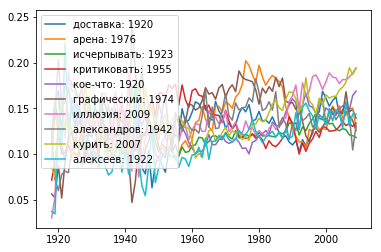

In [353]:
%time d = get_similar_word(big_diff, 'доставка', window=5)
d = sorted(d, key=lambda x:x[1])
plot_phrase(' '.join([i[0] for i in d[:10]]))
d[:10]

In [342]:
big_diff.unigram

0        договариваться
1               исторша
2                    из
3                    он
4                 армша
5          гитлеровский
6                гитлер
7                   дер
8             государев
9          красноармеец
10                 гете
11           гитлеровец
12            конвенция
13          комиссариат
14             государь
15              кутузов
16                  дис
17              автореф
18             агитатор
19               гоголь
20      коллективизация
21              господь
22           германский
23               атаман
24                  они
25        интернационал
26                англо
27          языкознание
28               крылов
29                касса
             ...       
1219           изучение
1220           домашний
1221         достаточно
1222              из-за
1223            инженер
1224            изучать
1225         изменяться
1226           аналогия
1227        критический
1228           искажать
1229            

In [98]:
df.to_csv('deviations_from_mean.csv', index=False)